#                                         Exploratory Data Analysis

In [2]:
#importing libraries

import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Loading the data 
data=pd.read_csv('bank-full.csv',sep=';')

In [4]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
data.shape

(45211, 17)

There are 45211 data points and 17 columns of which one coloumn is the target lable. 

We have 16 features to play with.

In [6]:
# Observe the data types

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


We can see that there is a mix of categorical and numerical values in the data and there are no NULL values.

The target feature is binary coloumn where YES indicates that the customer has subscribed to long term deposit and NO indicated that they have not.

In [7]:
data['y'].replace('yes',1,inplace=True)
data['y'].replace('no',0,inplace=True)

# We will now study the Distributions 

Text(0.5,1,'Distribution of Job_Type')

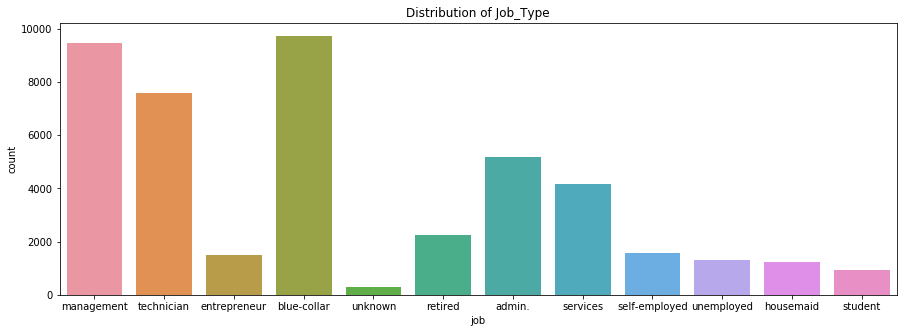

In [8]:
plt.figure(figsize=(15,5))
ax=sns.countplot(data['job'])
ax.set_title('Distribution of Job_Type')

Blue collar and Management job customers are high in count when compared to every other job_type.

Text(0.5,1,'Distribution of Education')

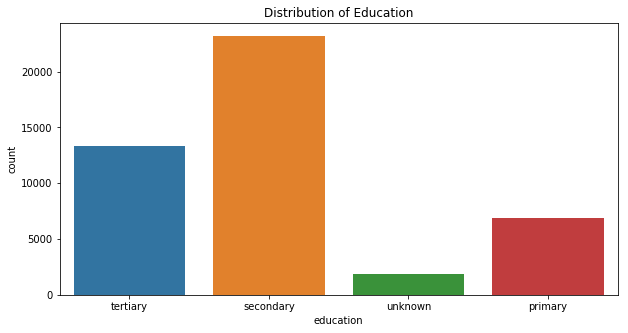

In [9]:
plt.figure(figsize=(10,5))
ax=sns.countplot(data['education'])
ax.set_title('Distribution of Education')

Most of the customers come under secondary education. 

Text(0.5,1,'Distribution of Default')

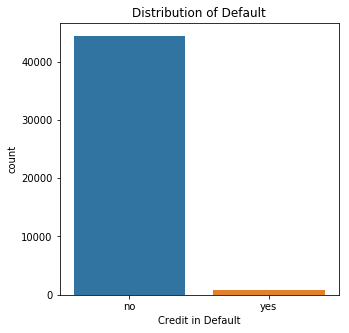

In [10]:
plt.figure(figsize=(5,5))
ax=sns.countplot(data['default'])
ax.set_xlabel('Credit in Default')
ax.set_title('Distribution of Default')

As we can see most of the customers do not default their credit.

Text(0.5,1,'Distribution of Marital_status')

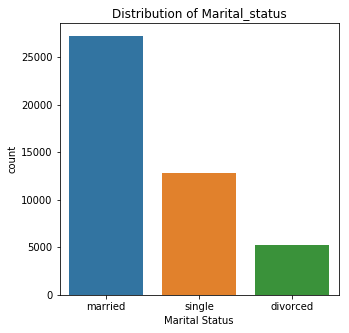

In [11]:
plt.figure(figsize=(5,5))
ax=sns.countplot(data['marital'])
ax.set_xlabel('Marital Status')
ax.set_title('Distribution of Marital_status')

Text(0.5,1,'Distribution of Housing Loan Status')

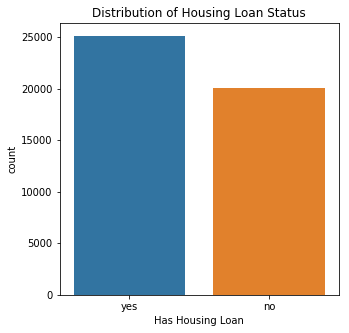

In [12]:
plt.figure(figsize=(5,5))
ax=sns.countplot(data['housing'])
ax.set_xlabel('Has Housing Loan')
ax.set_title('Distribution of Housing Loan Status')

Text(0.5,1,'Distribution of Personal Loan Status')

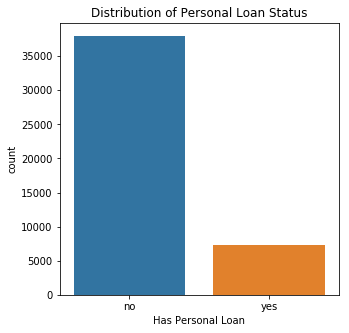

In [13]:
plt.figure(figsize=(5,5))
ax=sns.countplot(data['loan'])
ax.set_xlabel('Has Personal Loan')
ax.set_title('Distribution of Personal Loan Status')

Text(0.5,1,'Distribution of communication type')

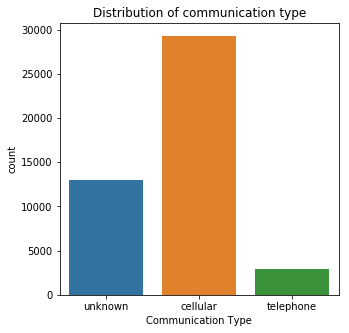

In [14]:
plt.figure(figsize=(5,5))
ax=sns.countplot(data['contact'])
ax.set_xlabel('Communication Type')
ax.set_title('Distribution of communication type')

Text(0.5,1,'Month wise distribution')

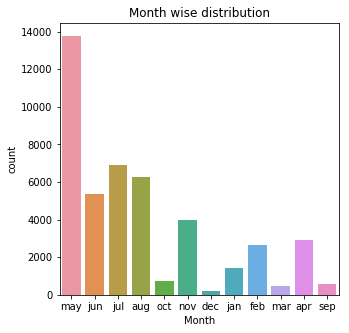

In [15]:
plt.figure(figsize=(5,5))
ax=sns.countplot(data['month'])
ax.set_xlabel('Month')
ax.set_title('Month wise distribution')

We can observe that from the month of May to August there are lot of occurrences.

Text(0.5,1,'Marketing campaign wise distribution')

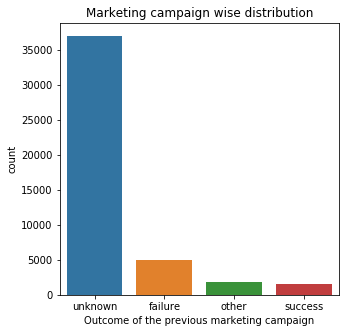

In [16]:
plt.figure(figsize=(5,5))
ax=sns.countplot(data['poutcome'])
ax.set_xlabel('Outcome of the previous marketing campaign')
ax.set_title('Marketing campaign wise distribution')

The outcomes previous marketing campaigns have been unknown mostly. 

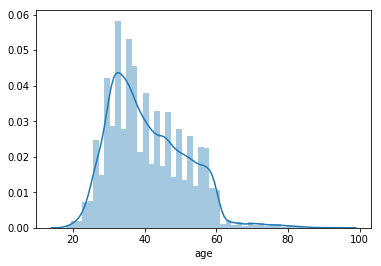

In [17]:
sns.distplot(data['age'])

There is a skew with the distribution of age. 

The young age group i.e 20-30 customers and old age above 60 customers normally do not tend to invest in long term deposits.
Lets see how the age affect the target coloumn in the further analysis.

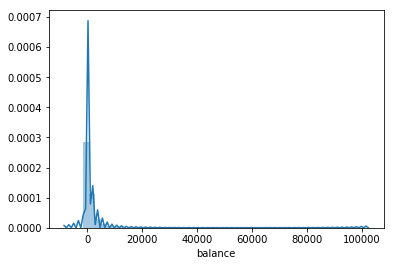

In [18]:
sns.distplot(data['balance'])

Most of the customer posses very low balance.

Logically customers with very low balance do not tend to invest more in long term deposits.

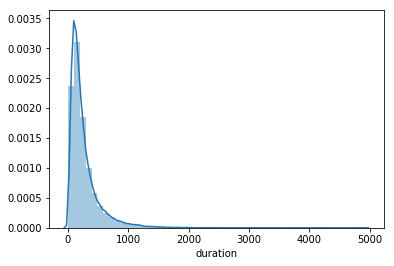

In [19]:
sns.distplot(data['duration'])

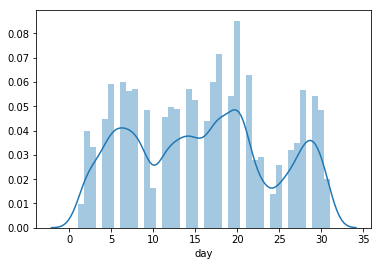

In [20]:
sns.distplot(data['day'])

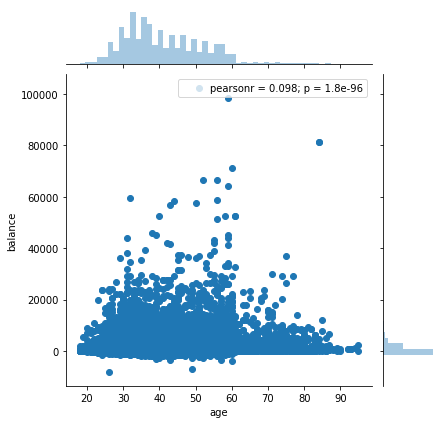

In [21]:
sns.jointplot('age','balance',data=data)

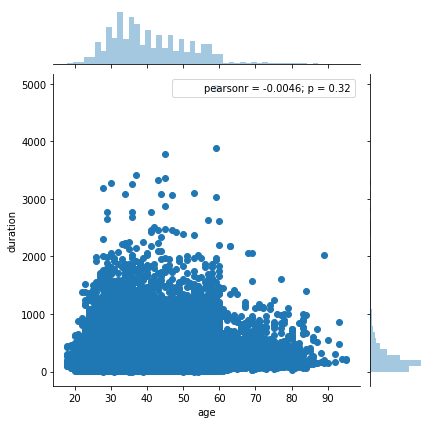

In [22]:
sns.jointplot(data.age,data.duration)

There is almost zero correlation between Age and Duration,Balance.

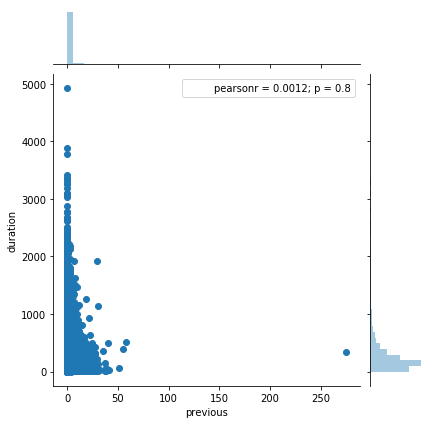

In [23]:
sns.jointplot(data.previous,data.duration)

The customer who were never been contacted before this campaign has spent lot of time on the call. 

Text(0.5,0,'Job Type')

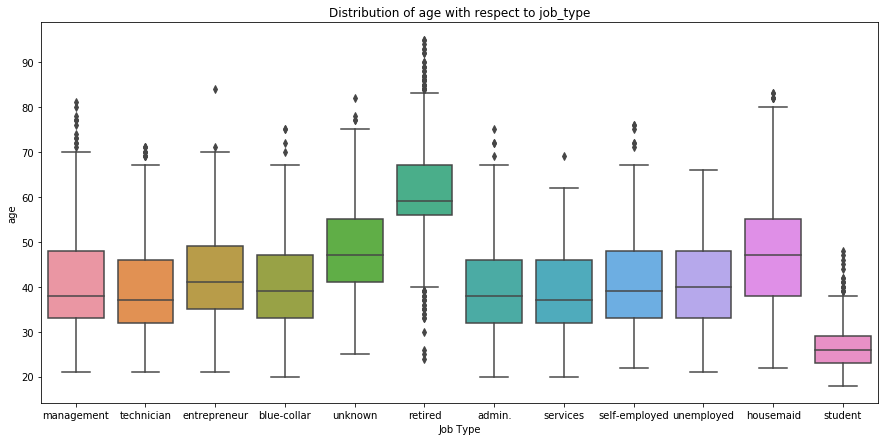

In [24]:
plt.figure(figsize=(15,7))
ax=sns.boxplot(x=data['job'],y=data['age'])
ax.set_title('Distribution of age with respect to job_type')
ax.set_xlabel('Job Type')

The above plot is the distribution of age among different job_types.

It represents the logic of age distribution with age too. 

Text(0.5,0,'Contact Type')

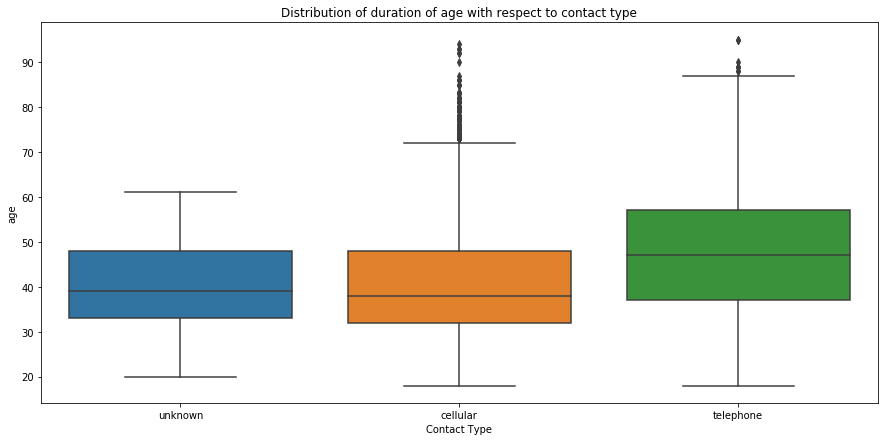

In [25]:
plt.figure(figsize=(15,7))
ax=sns.boxplot(x=data['contact'],y=data['age'])
ax.set_title('Distribution of duration of age with respect to contact type')
ax.set_xlabel('Contact Type')

The distribution of age with contact type shows that aged customers tend to communicate via telephone.

Text(0.5,0,'Job Type')

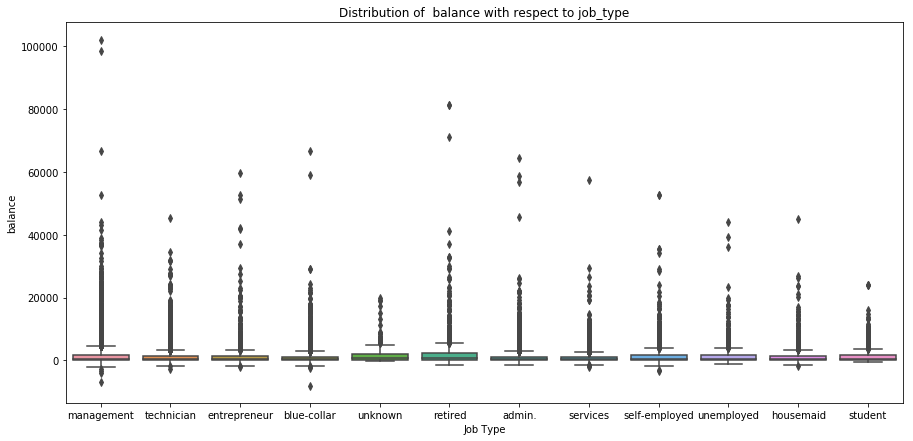

In [26]:
plt.figure(figsize=(15,7))
ax=sns.boxplot(x=data['job'],y=data['balance'])
ax.set_title('Distribution of  balance with respect to job_type')
ax.set_xlabel('Job Type')

The above plot is the distribution of balance among different job_types with lot of outliers it is bit difficult to differentiate the balabce with job_type. 

Customers who are Retired and who works in managment tend posses higer balance. 

Text(0.5,0,'Month')

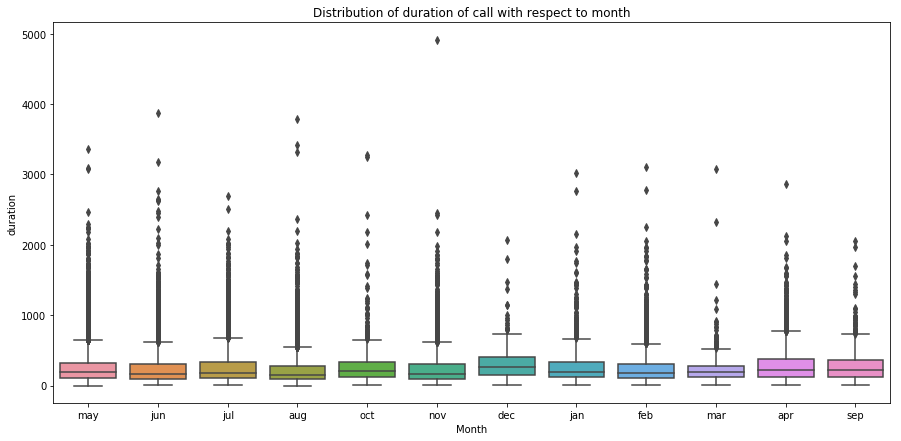

In [27]:
plt.figure(figsize=(15,7))
ax=sns.boxplot(x=data['month'],y=data['duration'])
ax.set_title('Distribution of duration of call with respect to month')
ax.set_xlabel('Month')

The distribution of duration of call with respect to all the month is almost same with few execptions.

The customer who were called in the month of december have spent slightly more time on the call followed by october and novemrber. 

This shows that during the year end the customer are more interested in new investments. 

Text(0.5,0,'Education Level')

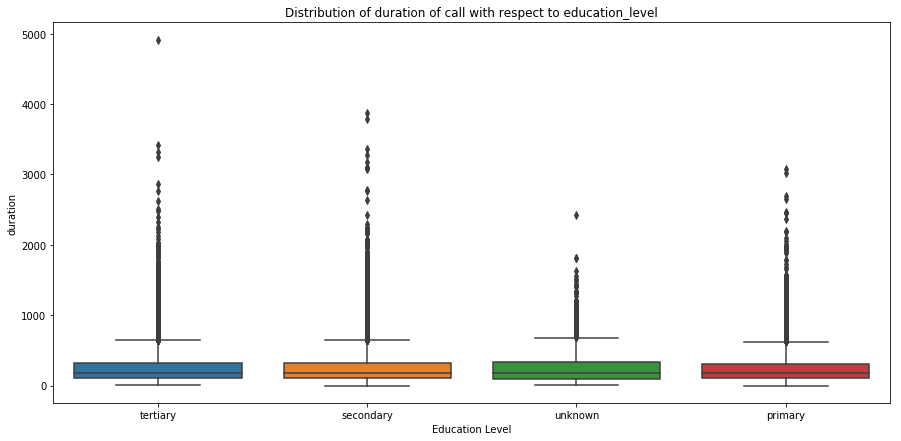

In [28]:
plt.figure(figsize=(15,7))
ax=sns.boxplot(x=data['education'],y=data['duration'])
ax.set_title('Distribution of duration of call with respect to education_level')
ax.set_xlabel('Education Level')

The distribution of duration of call with respect to all the education level is almost same. 

Customer Tertiary education tend to spend slighly more time in the call followed by secondary.

Text(0.5,0,'Contact Type')

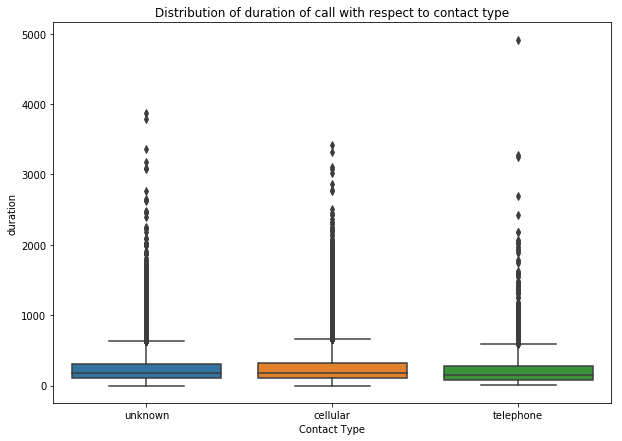

In [29]:
plt.figure(figsize=(10,7))
ax=sns.boxplot(x=data['contact'],y=data['duration'])
ax.set_title('Distribution of duration of call with respect to contact type')
ax.set_xlabel('Contact Type')

The duration of call is equally distributed with respect to contact type.

Text(0.5,0,'Outcome of Previous Campaign')

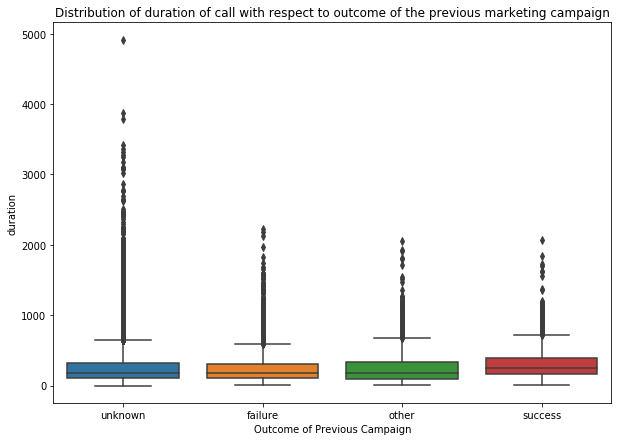

In [30]:
plt.figure(figsize=(10,7))
ax=sns.boxplot(x=data['poutcome'],y=data['duration'])
ax.set_title('Distribution of duration of call with respect to outcome of the previous marketing campaign')
ax.set_xlabel('Outcome of Previous Campaign')

# Distribution of Target Column with numerical coloumns

Text(0,0.5,'Age')

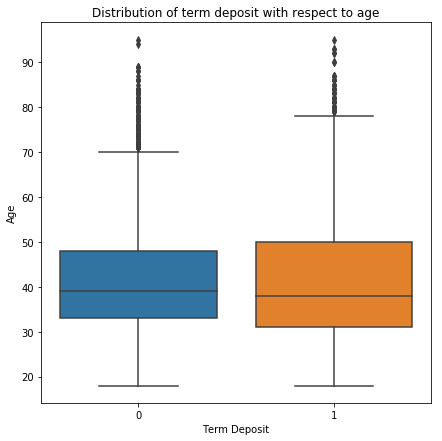

In [31]:
plt.figure(figsize=(7,7))
ax=sns.boxplot(x=data['y'],y=data['age'])
ax.set_title('Distribution of term deposit with respect to age')
ax.set_xlabel("Term Deposit")
ax.set_ylabel('Age')

The Distribution of the term deposit with to repsect age shows as the age increases there is slightly higher chance of customers subscribing to the term deposit.

Text(0,0.5,'Balance')

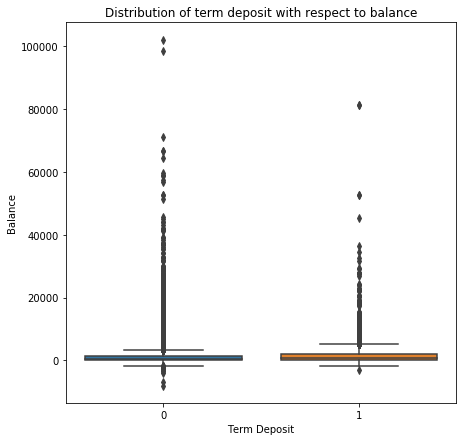

In [32]:
plt.figure(figsize=(7,7))
ax=sns.boxplot(x=data['y'],y=data['balance'])
ax.set_title('Distribution of term deposit with respect to balance')
ax.set_xlabel("Term Deposit")
ax.set_ylabel('Balance')

The Distribution of the term deposit with repsect to balance shows as the balance increases there is slightly higher chance of customers subscribing to the term deposis which is true logically too. 

Text(0,0.5,'Duration of last call')

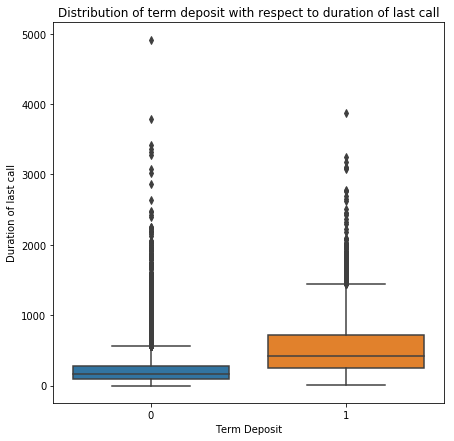

In [33]:
plt.figure(figsize=(7,7))
ax=sns.boxplot(x=data['y'],y=data['duration'])
ax.set_title('Distribution of term deposit with respect to duration of last call')
ax.set_xlabel("Term Deposit")
ax.set_ylabel('Duration of last call')

From the plot we can see that if the duration of call increases then the customer subscibes for the long term deposit which supports the obvious fact of customer who has the interest spends lot of time knowing about it. 

Text(0,0.5,'Last contact day of the month')

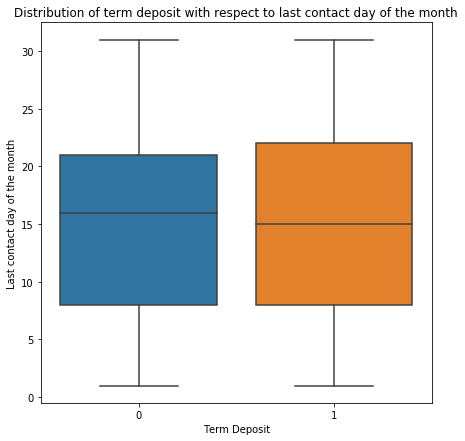

In [34]:
plt.figure(figsize=(7,7))
ax=sns.boxplot(x=data['y'],y=data['day'])
ax.set_title('Distribution of term deposit with respect to last contact day of the month')
ax.set_xlabel("Term Deposit")
ax.set_ylabel('Last contact day of the month')

The Box Plot distribution is almost same for both Yes and No to term deposits except that if the customer is called during the end of the month they have slighly higher chance of subscribing to the term deposits. 

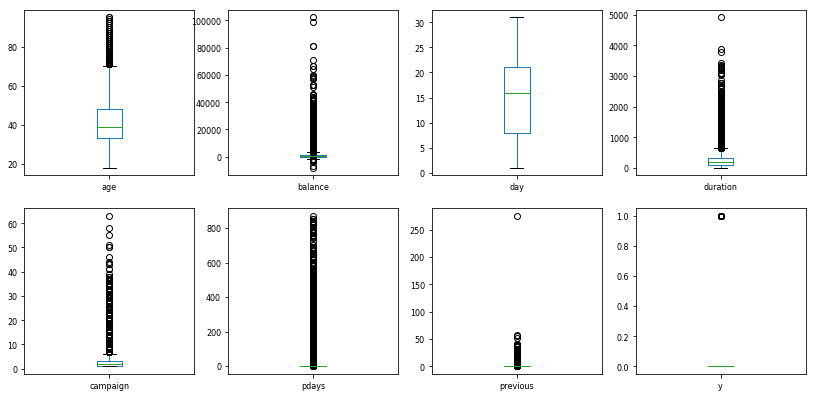

In [35]:
data.plot(kind='box', subplots=True, layout=(4,4), fontsize=8, figsize=(14,14))
plt.show()

This helps to point out the skew in many distributions so much so that data looks like outliers.

# Correlation Analysis

We need to transforming the categorical variables to binaries of 0 and 1 before we do correlation analysis.

In [36]:
data_complete=pd.get_dummies(data)

data_complete.head()

,age,balance,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,47,1506,5,92,1,-1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


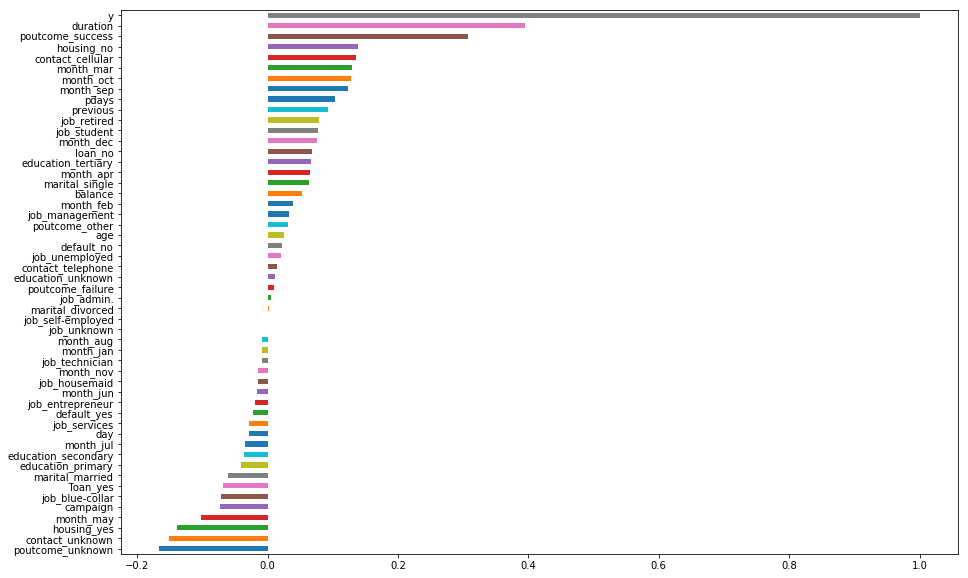

In [37]:
plt.figure(figsize=(15,10))
data_complete.corr()['y'].sort_values(ascending=True).plot.barh()

We can see that duration of call,p_outcome_success,absence of housing_loan,p_outcome_unknown,contact_unkown are highly correlated with target coloum.

This confirms what we found through our analysis above.

## Statistical Analysis

In [38]:
data_stats=pd.read_csv('bank-full.csv',sep=';')

In [39]:
data_stats.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [40]:
from scipy.stats import levene, shapiro, f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# One-Way ANOVA of education level and duration of call.

In [41]:
# Performing shapiro and levenes test to confirm assumptions of Normality & Equal Variances

# Shapiro Test
# Null Hypothesis - Data is normally distributed
# Alternate Hypothesis - Data is not normally distributed

print(shapiro(data[data['education'] == 'tertiary'].duration))
print(shapiro(data[data['education']=='secondary'].duration))
print(shapiro(data[data['education']=='unknown'].duration))
print(shapiro(data[data['education']=='primary'].duration))


(0.7123548984527588, 0.0)
(0.7338535785675049, 0.0)
(0.7743940353393555, 7.006492321624085e-45)
(0.7210391163825989, 0.0)


 P-value<0.05 hence data is not normal.
 
 However, ANOVA is robust to violation of normality rule, provided variances are equal.
 

In [42]:
# Levene's Test

# H0: All variances are equal
# Ha: Atleast one of the variances not equal

levene(data[data['education'] == 'tertiary'].duration, 
       data[data['education'] == 'secondary'].duration,
       data[data['education'] == 'primary'].duration,
       data[data['education'] == 'unknown'].duration)



LeveneResult(statistic=0.8407655368737061, pvalue=0.47128268296062714)

 p-value > 0.05 hence all variances are equal

 ANOVA:

- The null hypothesis is 
  the mean call duration of all the education levels are equal.

- And the alternate hypothesis is 
  the mean call duration of all the education levels are different. 

In [43]:
formula = 'duration ~ education'
model = ols(formula, data).fit()
aov_table = anova_lm(model, typ=2)
print(aov_table)

                 sum_sq       df         F    PR(>F)
education  4.342984e+04      3.0  0.218271  0.883777
Residual   2.998310e+09  45207.0       NaN       NaN


The p>0.05 indicates that we do not reject the null hypothesis.

There is no significant difference between the education levels 

# Two Way ANOVA of Previous Outcome and Housing Loan

In [44]:
# Performing shapiro and levenes test to confirm assumptions of Normality & Equal Variances

# Shapiro Test
# Null Hypothesis - Data is normally distributed
# Alternate Hypothesis - Data is not normally distributed

print(shapiro(data[data['poutcome'] =='unknown'].duration))
print(shapiro(data[data['poutcome']== 'other'].duration))
print(shapiro(data[data['poutcome']=='failure'].duration))
print(shapiro(data[data['poutcome']=='success'].duration))

(0.7186800241470337, 0.0)
(0.7780404090881348, 1.8216880036222622e-44)
(0.7446209192276001, 0.0)
(0.8077477216720581, 4.4599995029113834e-39)


In [45]:
print(shapiro(data[data['housing'] =='yes'].duration))
print(shapiro(data[data['housing']== 'no'].duration))

(0.7314223647117615, 0.0)
(0.721169114112854, 0.0)


p<0.05 hence we reject the null hypothesis.

Data is not normal but ANOVA is robust to the assumption of normaliy.

In [46]:
# Levene's Test

# H0: All variances are equal
# Ha: Atleast one of the variances not equal

levene(data[data['poutcome'] =='unknown'].duration,
       data[data['poutcome']== 'other'].duration,
       data[data['poutcome']=='failure'].duration,
       data[data['poutcome']=='success'].duration)



LeveneResult(statistic=9.81676525273609, pvalue=1.8090126914497257e-06)

p<0.05 hence the variances are not equal.

In [47]:
levene(data[data['housing'] =='yes'].duration,
       data[data['housing']== 'no'].duration)

LeveneResult(statistic=0.8219155437104307, pvalue=0.3646255324570078)

p>0.05 the variances are equal. 

Here one coloumn the variance are equal where as in the other coloumn the 
variances are not equal.

Since the null hypothesis is rejected we cannot go ahead with the ANOVA model.

# One Way ANOVA  of Contact Type  with Duration of call.

In [48]:
# Performing shapiro and levenes test to confirm assumptions of Normality & Equal Variances

# Shapiro Test
# Null Hypothesis - Data is normally distributed
# Alternate Hypothesis - Data is not normally distributed

print(shapiro(data[data['contact'] =='unknown'].duration))
print(shapiro(data[data['contact']== 'telephone'].duration))
print(shapiro(data[data['contact']=='cellular'].duration))

(0.7117701768875122, 0.0)
(0.6247349381446838, 0.0)
(0.7445440292358398, 0.0)


p<0.05 hence we reject the null hypothesis.

Data is not normal but ANOVA is robust to the assumption of normaliy.

In [49]:
# Levene's Test

# H0: All variances are equal
# Ha: Atleast one of the variances not equal

levene(data[data['contact'] =='unknown'].duration,
       data[data['contact']== 'telephone'].duration,
       data[data['contact']=='cellular'].duration)

LeveneResult(statistic=1.2094330496179753, pvalue=0.29837604402082213)

p>0.05 so the variance are equal.

 ANOVA:

- The null hypothesis is 
  the mean call duration of all the contact types are equal.

- And the alternate hypothesis is 
  the mean call duration of all the contact type are different. 

In [50]:
formula = 'duration ~ contact'
model = ols(formula, data).fit()
aov_table = anova_lm(model, typ=2)
print(aov_table)

                sum_sq       df          F        PR(>F)
contact   2.640771e+06      2.0  19.925809  2.239459e-09
Residual  2.995712e+09  45208.0        NaN           NaN


p < 0.05 so we reject the null hypothesis.

The mean call duration of all the contact types are significantly different.

We perform Tukey HSD test to which group is significant.

In [52]:
mc = MultiComparison(data['duration'], data['contact'])
result = mc.tukeyhsd()
print(result)
print(mc.groupsunique)

  Multiple Comparison of Means - Tukey HSD,FWER=0.05 
  group1    group2  meandiff  lower    upper   reject
-----------------------------------------------------
 cellular telephone -27.6478 -39.3821 -15.9135  True 
 cellular  unknown  -10.6735 -17.0287 -4.3183   True 
telephone  unknown  16.9743   4.5961  29.3526   True 
-----------------------------------------------------
['cellular' 'telephone' 'unknown']


# Chi Square Test between Housing Loan and Personal Loan 

In [53]:
from scipy.stats import chisquare,chi2_contingency

In [54]:
chisquare(data['housing'].value_counts())

#The p-value < 0.05 hence we conclude that proportions are not the same

Power_divergenceResult(statistic=563.8539514719869, pvalue=1.219719721387039e-124)

In [55]:
chisquare(data["loan"].value_counts())

#The p-value < 0.05 hence we conclude that proportions are not the same

Power_divergenceResult(statistic=20877.722877175907, pvalue=0.0)

In [56]:
cont = pd.crosstab(data['housing'],
                   data["loan"])

In [57]:
cont

loan,no,yes
housing,,
no,17204,2877
yes,20763,4367


In [58]:
chi2_contingency(cont)

(76.97480834381858,
 1.7315256945310098e-18,
 1,
 array([[16863.49178297,  3217.50821703],
        [21103.50821703,  4026.49178297]]))

The p-value < 0.05 hence we conclude that the 2 categorical variables are Dependent 

# Chi Square Test between Job and Education 

In [ ]:
chisquare(data['job'].value_counts())

#The p-value < 0.05 hence we conclude that proportions are not the same

In [ ]:
chisquare(data['education'].value_counts())

#The p-value < 0.05 hence we conclude that proportions are not the same

In [ ]:
cont = pd.crosstab(data['education'],
                   data["job"])

cont

In [ ]:
chi2_contingency(cont)

The p-value < 0.05 hence we conclude that the 2 categorical variables are Dependent 

# Chi Square Test between Marital Status and Housing Loan  

In [ ]:
chisquare(data['housing'].value_counts())

#The p-value < 0.05 hence we conclude that proportions are not the same

In [ ]:
chisquare(data['marital'].value_counts())

#The p-value < 0.05 hence we conclude that proportions are not the same

In [ ]:
cont=pd.crosstab(data['housing'],
                 data['marital'])

cont

In [ ]:
chi2_contingency(cont)

The p-value < 0.05 hence we conclude that the 2 categorical variables are Dependent 

# Chi Square Test Between Previous Outcome and Term Deposit

In [ ]:
chisquare(data['poutcome'].value_counts())

#The p-value < 0.05 hence we conclude that proportions are not the same

In [ ]:
chisquare(data['y'].value_counts())

#The p-value < 0.05 hence we conclude that proportions are not the same

In [ ]:
cont=pd.crosstab(data['poutcome'],
                 data['y'])

cont

In [ ]:
chi2_contingency(cont)

The p-value < 0.05 hence we conclude that the categorical variables are Dependent. 